In [1]:
# Import useful libraries

# for computation

import numpy as np
import pandas as pd

# for visualization

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Gather the Data

In [2]:
# reading the dataset
# get the data from here : http://insideairbnb.com/get-the-data.html

# Boston

boston_calendar_sep2016 = pd.read_csv('./data/Boston_calendar_sep2016.csv')
boston_calendar_oct2017 = pd.read_csv('./data/Boston_calendar_oct2017.csv')
boston_calendar_apr2018 = pd.read_csv('./data/Boston_calendar_apr2018.csv')
boston_calendar_jan2019 = pd.read_csv('./data/Boston_calendar_jan2019.csv')
boston_calendar_jan2020 = pd.read_csv('./data/Boston_calendar_jan2020.csv')
boston_listing = pd.read_csv('./data/Boston_listings_jan2020.csv')


# reading the dataset
# get the data from here : http://insideairbnb.com/get-the-data.html

# Seattle

seattle_calendar_jan2016 = pd.read_csv('./data/Seattle_calendar_jan2016.csv')
seattle_calendar_apr2018 = pd.read_csv('./data/Seattle_calendar_apr2018.csv')
seattle_calendar_jan2019 = pd.read_csv('./data/Seattle_calendar_jan2019.csv')
seattle_calendar_jan2020 = pd.read_csv('./data/Seattle_calendar_jan2020.csv')
seattle_listing = pd.read_csv('./data/Seattle_listings_jan2020.csv')


## Assess the data

In [3]:
boston_calendar_oct2017.head()

,listing_id,date,available,price
0,20872145,2018-09-22,f,NaN
1,20872145,2018-09-21,f,NaN
2,20872145,2018-09-20,f,NaN
3,20872145,2018-09-19,f,NaN
4,20872145,2018-09-18,f,NaN


In [4]:
boston_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20200105171901,2020-01-05,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,f,f,super_strict_30,f,f,1,1,0,0,0.29
1,8789,https://www.airbnb.com/rooms/8789,20200105171901,2020-01-05,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Fully Furnished studio with enclosed bedroom. ...,"Bright, 1 bed with curved glass windows facing...",none,Beacon Hill is a historic neighborhood filled ...,...,f,f,strict_14_with_grace_period,f,f,10,10,0,0,0.36
2,10730,https://www.airbnb.com/rooms/10730,20200105171901,2020-01-05,Bright 1bed facing Golden Dome,"Bright, spacious unit, new galley kitchen, new...",Bright one bed facing the golden dome of the S...,"Bright, spacious unit, new galley kitchen, new...",none,Beacon Hill is located downtown and is conveni...,...,f,f,strict_14_with_grace_period,f,f,10,10,0,0,0.25
3,10811,https://www.airbnb.com/rooms/10811,20200105171901,2020-01-05,"Back Bay Apt Studio-3 blocks to Pru center & ""T""",Stunning Back Bay furnished studio apartment. ...,"Back Bay Studio Apt - Private bath, A/C, Cabl...",Stunning Back Bay furnished studio apartment. ...,none,A one-square mile neighborhood that is arguabl...,...,f,f,strict_14_with_grace_period,f,f,6,6,0,0,0.19
4,10986,https://www.airbnb.com/rooms/10986,20200105171901,2020-01-05,Waterfront/North End Furnished Large Studio Apt,Chic furnished studio apartment is located on ...,Waterfront Studio apt on Commercial St. Tota...,Chic furnished studio apartment is located on ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,6,6,0,0,0.05


## Data Cleaning

We have to remove the '$' sign of the **price** column and convert srting into float

In [5]:
# function to remove $ sign and return float

def str_to_float(string):
    """
    INPUT
    string - string of the price (ex : $250.00)
    
    OUTPUT
    float - returns float value of the price (ex: 250.0)
    """
    if string[:1] == '$':
        return float(string[1:].replace(',', ''))
    else:
        return np.nan

We can extract the month and year from the **date** column 

In [6]:
# Boston

# Sep 2016
boston_calendar_sep2016["price"] = boston_calendar_sep2016["price"].dropna().apply(str_to_float)
boston_calendar_sep2016["year"] = pd.DatetimeIndex(boston_calendar_sep2016['date']).year
boston_calendar_sep2016["month"] = pd.DatetimeIndex(boston_calendar_sep2016['date']).month


# Oct 2017
boston_calendar_oct2017["price"] = boston_calendar_oct2017["price"].dropna().apply(str_to_float)
boston_calendar_oct2017["year"] = pd.DatetimeIndex(boston_calendar_oct2017['date']).year
boston_calendar_oct2017["month"] = pd.DatetimeIndex(boston_calendar_oct2017['date']).month

# Apr2018
boston_calendar_apr2018["price"] = boston_calendar_apr2018["price"].dropna().apply(str_to_float)
boston_calendar_apr2018["year"] = pd.DatetimeIndex(boston_calendar_apr2018['date']).year
boston_calendar_apr2018["month"] = pd.DatetimeIndex(boston_calendar_apr2018['date']).month

# Jan 2019
boston_calendar_jan2019["price"] = boston_calendar_jan2019["price"].dropna().apply(str_to_float)
boston_calendar_jan2019["year"] = pd.DatetimeIndex(boston_calendar_jan2019['date']).year
boston_calendar_jan2019["month"] = pd.DatetimeIndex(boston_calendar_jan2019['date']).month

# Jan 2020
boston_calendar_jan2020["price"] = boston_calendar_jan2020["price"].dropna().apply(str_to_float)
boston_calendar_jan2020["year"] = pd.DatetimeIndex(boston_calendar_jan2020['date']).year
boston_calendar_jan2020["month"] = pd.DatetimeIndex(boston_calendar_jan2020['date']).month

# boston listing
boston_listing["price"] = boston_listing["price"].apply(str_to_float) 


# Seattle

# Jan 2016

seattle_calendar_jan2016["price"] = seattle_calendar_jan2016["price"].dropna().apply(str_to_float)

seattle_calendar_jan2016["year"] = pd.DatetimeIndex(seattle_calendar_jan2016['date']).year

seattle_calendar_jan2016["month"] = pd.DatetimeIndex(seattle_calendar_jan2016['date']).month



# Apr2018

seattle_calendar_apr2018["price"] = seattle_calendar_apr2018["price"].dropna().apply(str_to_float)

seattle_calendar_apr2018["year"] = pd.DatetimeIndex(seattle_calendar_apr2018['date']).year

seattle_calendar_apr2018["month"] = pd.DatetimeIndex(seattle_calendar_apr2018['date']).month



# Jan 2019

seattle_calendar_jan2019["price"] = seattle_calendar_jan2019["price"].dropna().apply(str_to_float)

seattle_calendar_jan2019["year"] = pd.DatetimeIndex(seattle_calendar_jan2019['date']).year

seattle_calendar_jan2019["month"] = pd.DatetimeIndex(seattle_calendar_jan2019['date']).month



# Jan 2020

seattle_calendar_jan2020["price"] = seattle_calendar_jan2020["price"].dropna().apply(str_to_float)

seattle_calendar_jan2020["year"] = pd.DatetimeIndex(seattle_calendar_jan2020['date']).year

seattle_calendar_jan2020["month"] = pd.DatetimeIndex(seattle_calendar_jan2020['date']).month

# Seattle listing
seattle_listing["price"] = seattle_listing["price"].apply(str_to_float)

Our plan is to see how much the yearly average pricing has changed from the year 2016-2020 and investigate any general trend. <br>

Let's extract the yearly data from the above dataset. We only need **year ,month, available, and price** columns


In [7]:
# Boston

# Year 2017
boston_2017_p1 = boston_calendar_sep2016[boston_calendar_sep2016["year"] == 2017]
boston_2017_p2 = boston_calendar_oct2017[boston_calendar_oct2017["year"] == 2017]

boston_2017 = pd.concat([boston_2017_p1,boston_2017_p2], axis = 0)
boston_2017 = boston_2017[["year" ,"month", "available" ,"price"]]

# Year 2018
boston_2018_p1 = boston_calendar_oct2017[boston_calendar_oct2017["year"] == 2018]
boston_2018_p2 = boston_calendar_apr2018[boston_calendar_apr2018["year"] == 2018]

boston_2018 = pd.concat([boston_2018_p1,boston_2018_p2], axis = 0)
boston_2018 = boston_2018[["year" ,"month", "available" ,"price"]]

# Year 2019
boston_2019_p1 = boston_calendar_apr2018[boston_calendar_apr2018["year"] == 2019]
boston_2019_p2 = boston_calendar_jan2019[boston_calendar_jan2019["year"] == 2019]

boston_2019 = pd.concat([boston_2019_p1,boston_2019_p2], axis = 0)
boston_2019 = boston_2019[["year" ,"month", "available" ,"price"]]

# Year 2020
boston_2020_p1 = boston_calendar_jan2019[boston_calendar_jan2019["year"] == 2020]
boston_2020_p2 = boston_calendar_jan2020[boston_calendar_jan2020["year"] == 2020]

boston_2020 = pd.concat([boston_2020_p1,boston_2020_p2], axis = 0)
boston_2020 = boston_2020[["year" ,"month", "available" ,"price"]]

# Seattle

# Year 2016
seattle_2016 = seattle_calendar_jan2016[seattle_calendar_jan2016["year"] == 2016]
seattle_2016 = seattle_2016[["year" ,"month", "available" ,"price"]]

# Year 2018
seattle_2018 = seattle_calendar_apr2018[seattle_calendar_apr2018["year"] == 2018]

seattle_2018 = seattle_2018[["year" ,"month", "available" ,"price"]]

# Year 2019
seattle_2019_p1 = seattle_calendar_apr2018[seattle_calendar_apr2018["year"] == 2019]
seattle_2019_p2 = seattle_calendar_jan2019[seattle_calendar_jan2019["year"] == 2019]

seattle_2019 = pd.concat([seattle_2019_p1,seattle_2019_p2], axis = 0)
seattle_2019 = seattle_2019[["year" ,"month", "available" ,"price"]]

# Year 2020
seattle_2020_p1 = seattle_calendar_jan2019[seattle_calendar_jan2019["year"] == 2020]
seattle_2020_p2 = seattle_calendar_jan2020[seattle_calendar_jan2020["year"] == 2020]

seattle_2020 = pd.concat([seattle_2020_p1,seattle_2020_p2], axis = 0)
seattle_2020 = seattle_2020[["year" ,"month", "available" ,"price"]]

Let's expand the **available** column using one-hot encoding

In [8]:
# Boston

# 2017
boston_one_hot_2017 = pd.get_dummies(boston_2017['available'])
boston_2017 = boston_2017.join(boston_one_hot_2017)

# 2018
boston_one_hot_2018 = pd.get_dummies(boston_2018['available'])
boston_2018 = boston_2018.join(boston_one_hot_2018)

#2019
boston_one_hot_2019 = pd.get_dummies(boston_2019['available'])
boston_2019 = boston_2019.join(boston_one_hot_2019)

#2020
boston_one_hot_2020 = pd.get_dummies(boston_2020['available'])
boston_2020 = boston_2020.join(boston_one_hot_2020)


# Seattle

# 2016
seattle_one_hot_2016 = pd.get_dummies(seattle_2016['available'])
seattle_2016 = seattle_2016.join(seattle_one_hot_2016)

# 2018
seattle_one_hot_2018 = pd.get_dummies(seattle_2018['available'])
seattle_2018 = seattle_2018.join(seattle_one_hot_2018)

#2019
seattle_one_hot_2019 = pd.get_dummies(seattle_2019['available'])
seattle_2019 = seattle_2019.join(seattle_one_hot_2019)

#2020
seattle_one_hot_2020 = pd.get_dummies(seattle_2020['available'])
seattle_2020 = seattle_2020.join(seattle_one_hot_2020)

## Merge the calendar data¶

In [10]:
boston_total = pd.concat([boston_2017,boston_2018,boston_2019,boston_2020], axis = 0)

seattle_total = pd.concat([seattle_2016,seattle_2018,seattle_2019,seattle_2020], axis = 0)

In [11]:
# Free up some memory


boston_calendar_sep2016 = []
boston_calendar_oct2017 = []
boston_calendar_apr2018 = []
boston_calendar_jan2019 = []
boston_calendar_jan2020 = []

boston_one_hot_2017 = []
boston_one_hot_2018 = []
boston_one_hot_2019 = []
boston_one_hot_2020 = []
boston_2017 = []
boston_2018 = []
boston_2019 = []
boston_2020 = []

# Free up some memory


seattle_calendar_sep2016 = []
seattle_calendar_apr2018 = []
seattle_calendar_jan2019 = []
seattle_calendar_jan2020 = []

seattle_one_hot_2016 = []
seattle_one_hot_2019 = []
seattle_one_hot_2020 = []
seattle_2018 = []
seattle_2019 = []

## Analyze and visualize the data

We can ask 4 business questions from the data. Answer to each question can be analyzed through visualization

## Question 1: Which place is cheaper to stay? Boston or Seattle.

To answer this question I downloaded the Boston and Seattle data for the past few years and calculated the average pricing for each year. The following figures explain it.

Text(0.5, 0, 'Year')

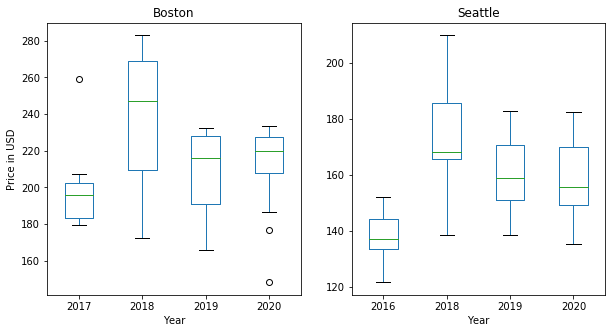

In [12]:
figure, axes = plt.subplots(1, 2,figsize=(10,5))
seattle_total.groupby(["month","year"]).price.mean().unstack().plot(kind='box',title = "Seattle", ax = axes[1]);
boston_total.groupby(["month","year"]).price.mean().unstack().plot(kind='box',title = "Boston",ax = axes[0]);
axes[0].set_ylabel("Price in USD")
axes[0].set_xlabel("Year");
axes[1].set_xlabel("Year");
#plt.savefig('avg_price.png')

In [14]:
# Average housing price in Boston by year
boston_total.groupby(["year"]).price.mean()

year
2017    195.516520
2018    245.643596
2019    205.925102
2020    208.232248
Name: price, dtype: float64

In [13]:
# Average housing price in Seattle by year
seattle_total.groupby(["year"]).price.mean()

year
2016    137.951375
2018    178.924106
2019    159.397455
2020    158.401441
Name: price, dtype: float64

So, from the above graph we can see that Seattle is cheaper to visit. For the past two years the average price of seattle is **159 dollars** whereas, the average price of Boston is **206 dollars**

## Question 2: What is the best time to visit these places?

To address this question, we have to look into the availability of Airbnb housing and price change during the season.

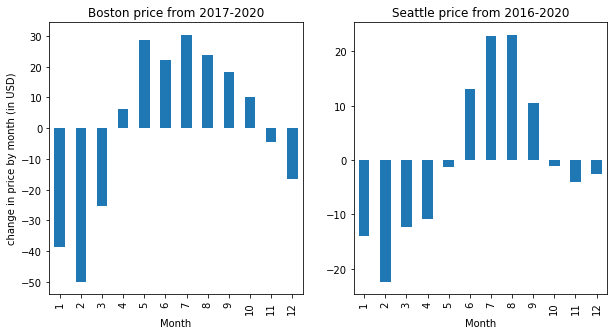

In [15]:
figure, axes = plt.subplots(1, 2,figsize=(10,5))

(boston_total.groupby(["month"]).price.mean() - boston_total.price.mean()).plot(kind='bar', title = "Boston price from 2017-2020",ax = axes[0])
(seattle_total.groupby(["month"]).price.mean() - seattle_total.price.mean()).plot(kind='bar', title = "Seattle price from 2016-2020",ax = axes[1])
axes[0].set_ylabel("change in price by month (in USD)");
axes[0].set_xlabel("Month");
axes[1].set_xlabel("Month");
#plt.savefig('price_change.png')

From this graph, we can see that since Boston has more extreme weather compared to Seattle, Boston has more price variation. Also, from the end of spring to the end of fall (March — November), Boston Airbnb's price is higher than average. So for Boston, **May and July** should be avoided if you want to save money. **March and November** are the best months to visit. During the winter season, **February** has the least price.<br>
Similarly for Seattle, **July and August** should be avoided and **February** is the cheapest month of the year. From spring to the end of fall **March, April, May, October, and November** are the best months to visit.

## Question 3: Which city is more popular and what is the ideal time to visit?

### Average occupancy

In [16]:
# Average yearly occupancy of Boston (in percentage)

boston_total.groupby(["year"]).f.mean() * 100

year
2017    50.920629
2018    58.750468
2019    62.719612
2020    52.666338
Name: f, dtype: float64

In [17]:
# Average yearly occupancy of Seattle (in percentage)

seattle_total.groupby(["year"]).f.mean() * 100

year
2016    32.980647
2018    63.092975
2019    64.274842
2020    59.549681
Name: f, dtype: float64

Over the last few years, the average occupancy of Boston and Seattle is 58% and 60% respectively. which suggests that Seattle is more popular among visitors. So what time people usually try to visit these cities?

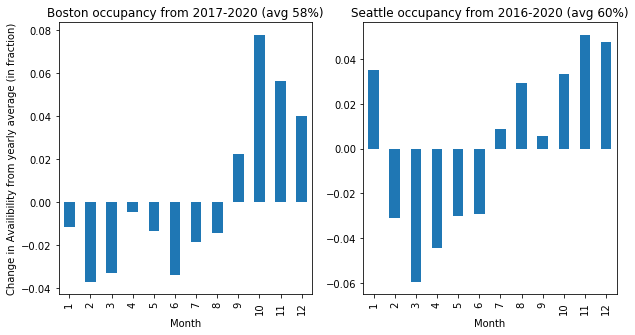

In [18]:
figure, axes = plt.subplots(1, 2,figsize=(10,5))

(boston_total.groupby(["month"]).f.mean() - boston_total.f.mean()).plot(kind='bar',title = "Boston occupancy from 2017-2020 (avg 58%)",ax = axes[0]);


(seattle_total.groupby(["month"]).f.mean() - seattle_total.f.mean()).plot(kind='bar',title = "Seattle occupancy from 2016-2020 (avg 60%)",ax = axes[1]);
axes[0].set_ylabel("Change in Availibility from yearly average (in fraction)");
axes[0].set_xlabel("Month");
axes[1].set_xlabel("Month");
#plt.savefig('accupancy.png')

As we can see, during early winter Boston is more occupied than the yearly average (more than 4% of the yearly average).<br>
Seattle has more occupancy in **January** and from **July — December**, which also suggests Seattle being more popular among the two.


## Question 4: What are the popular areas to stay and what is the recommended type of housing?

### where are most of the hosts located in Boston?

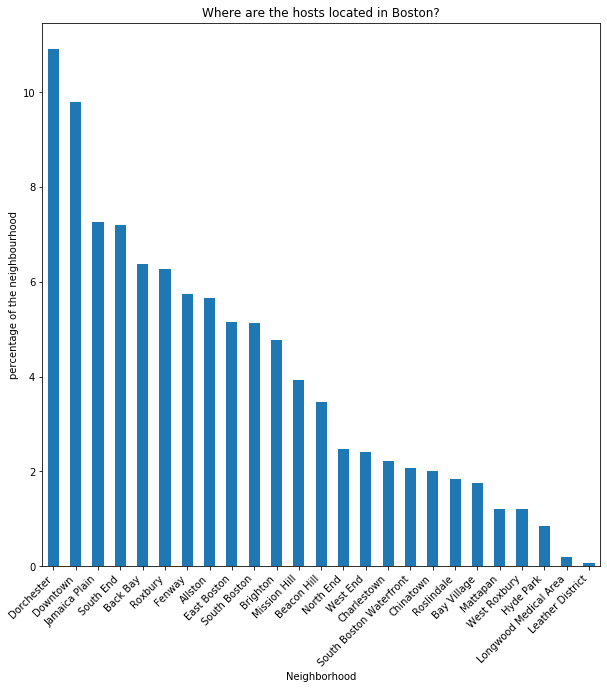

In [19]:
plt.figure(figsize = (10,10))
host_loc = boston_listing.neighbourhood_cleansed.value_counts()

(host_loc*100/boston_listing.neighbourhood_cleansed.value_counts().dropna().sum()).plot(kind="bar");
plt.ylabel('percentage of the neighbourhood')
plt.xlabel( "Neighborhood")
plt.title("Where are the hosts located in Boston?");
plt.xticks(rotation=45, ha='right');
#plt.savefig('most_host.png')

As we can see from the above graph the more than 50% of the hosing is located in **Dorchester, Downtown, Jamaica Plain, South End, Back Bay, and Roxbury** <br>

### So what are the recommended neighborhoods in Boston?


If 75% of the hosts in each neighbourhood are rated more than 8, that neighbourhood can be recommended.

We can check the rating of these neighbourhoods and find out which neighbourhood has ratings more than 80 out of 100 and we can filter out places with less than 70/100 rating.

In [20]:
above_80 = boston_listing[boston_listing['review_scores_rating'] > 80.0]
below_70 = boston_listing[boston_listing['review_scores_rating'] < 70.0]

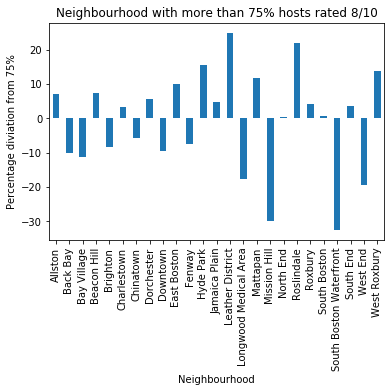

In [22]:
host_loc80 = above_80.neighbourhood_cleansed.value_counts()
(host_loc80*100/host_loc - 75).dropna().plot(kind="bar");
plt.ylabel('Percentage diviation from 75%')
plt.xlabel('Neighbourhood')
plt.title("Neighbourhood with more than 75% hosts rated 8/10");
#plt.savefig('recomended_palce.png')

Here 0 marks the neighborhood with 75% of the hosts. Above 0 are the recommended places.

From the graph above the recommended properties are **Allston, Beacon Hill, Charlestown, Dorchester, East Boston, Hyde Park, Jamaica Plain, Leather District, Mattapan, North End, Roslindale, Roxbury, South Boston, South End, West Roxbury.** <br>
If you prefer a popular neighbourhood, **Jamaica Plain, Dorchester, Roxbury, and South End** is recommended. <br>
In terms of rating, most places in **Hyde Park, Leather District, Mattapan, Roslindale, West Roxbury** are highly rated, but further research is needed since these places have lesser number of hosts.


### Which places should be avoided in Boston?

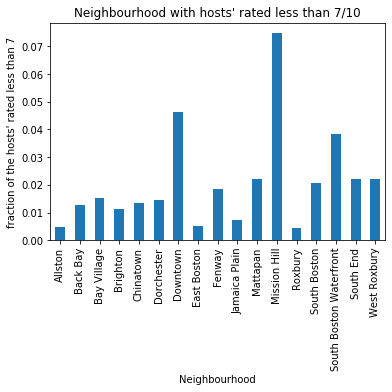

In [23]:
host_loc70 = below_70.neighbourhood_cleansed.value_counts()
(host_loc70/host_loc).dropna().plot(kind="bar");
plt.ylabel('fraction of the hosts\' rated less than 7')
plt.xlabel('Neighbourhood')
plt.title("Neighbourhood with hosts' rated less than 7/10");
#plt.savefig('avoid.png')

From the graph above We can see that **Downtown and Misson Hill** have the most number of hosts' with less than 7 rating. So these places should be avoided.

### What is the recommended type of housing in Boston?

Property type vs Price

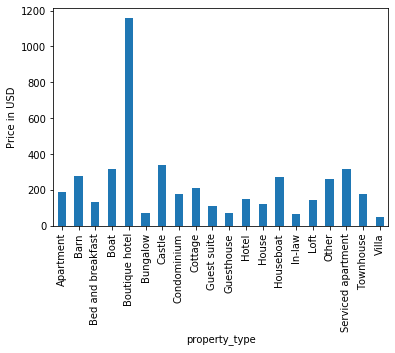

In [25]:
(boston_listing.groupby(["property_type"]).price.mean()).dropna().plot(kind='bar');
plt.ylabel('Price in USD');
#plt.savefig('recomended_housing.png')

If our goal is to save money, then we see that **Bungalow, Guesthouse, In-law, and Villa** are among the cheaper options to stay in Boston (Costs $150 or less).

#### Similar analysis on Seattle

#### where are most of the hosts located in seattle?

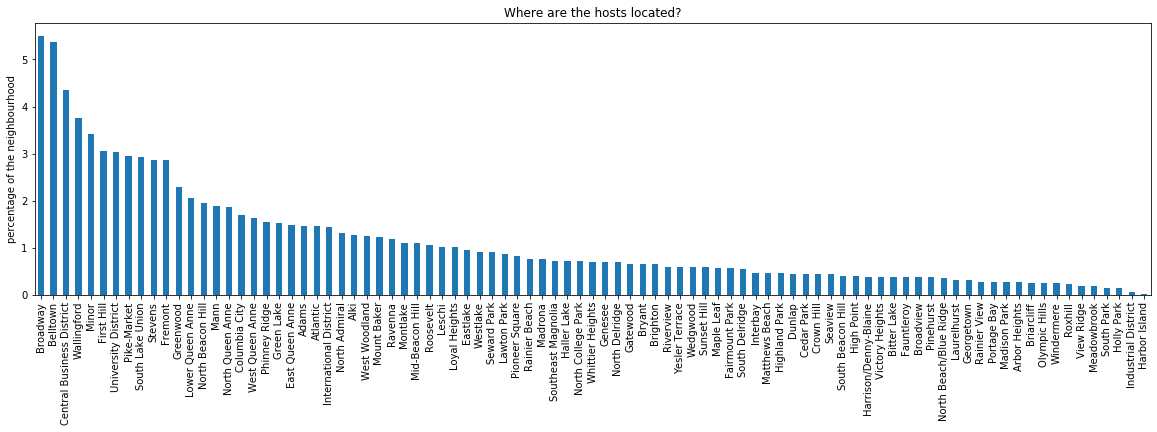

In [28]:
plt.figure(figsize=(20,5))

seattle_host_loc = seattle_listing.neighbourhood_cleansed.value_counts().dropna()

(seattle_host_loc*100/seattle_listing.neighbourhood_cleansed.value_counts().dropna().sum()).plot(kind="bar");
plt.ylabel('percentage of the neighbourhood')
plt.title("Where are the hosts located?");

In [27]:
seattle_host_loc[:16].sum()/seattle_listing.neighbourhood_cleansed.value_counts().dropna().sum()

0.5010801880798068

First 15 neighbourhoods has 50% of the hosts

As we can see from above graph top 50% neighbourhoods are located in **Broadway, Belltown, Central Business District, Wallingford, and Minor,First Hill, Univeristy District, Pike-Market, ..**


#### So what is the recomended neighbourhood in Seattle?

In [30]:
seattle_above_80 = seattle_listing[seattle_listing['review_scores_rating'] > 80.0]
seattle_below_70 = seattle_listing[seattle_listing['review_scores_rating'] < 70.0]

We can check the rating of these neighbourhoods and find out which neighbourhood has ratings more than 80 out of 100 and we can filter out places with less than 70/100 rating.

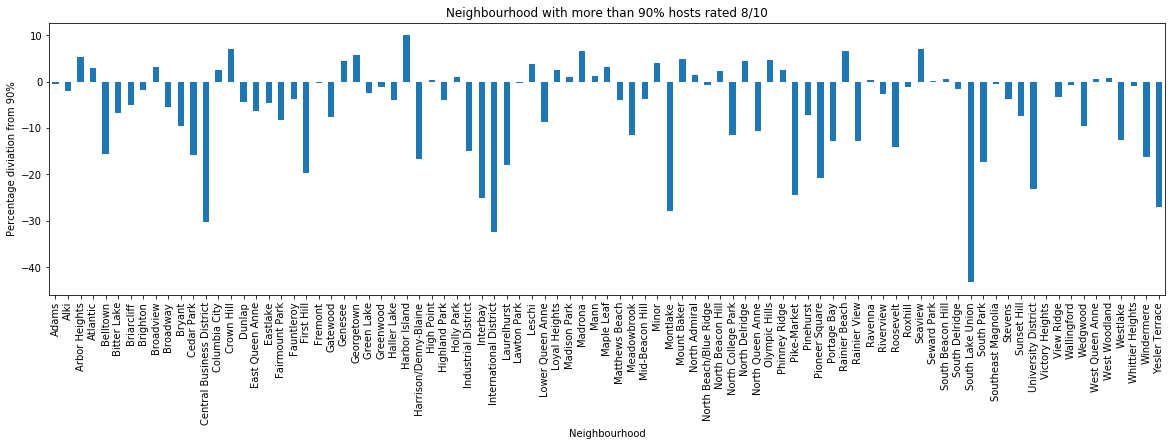

In [31]:
plt.figure(figsize=(20,5))
seattle_host_loc80 = seattle_above_80.neighbourhood_cleansed.value_counts().dropna()
(seattle_host_loc80*100/seattle_host_loc - 90).dropna().plot(kind="bar");
plt.ylabel('Percentage diviation from 90%')
plt.xlabel('Neighbourhood')
plt.title("Neighbourhood with more than 90% hosts rated 8/10");

More than 95% housing reted 8/10

In [34]:
[(seattle_host_loc80*100/seattle_host_loc - 95).index[i] for i, value in enumerate(seattle_host_loc80*100/seattle_host_loc - 95) if value > 0]

['Arbor Heights',
 'Crown Hill',
 'Georgetown',
 'Harbor Island',
 'Madrona',
 'Rainier Beach',
 'Seaview']

Seattle is more spread out than Boston, and most of the neighbourhood is highly rated. <br>
If 90% of the hosts in each neighbourhood are rated more than 8, that neighbourhood can be rocomended. So the recomended properties are **Arbor Heights, Atlantic, Broadview, Columbia City, Crown Hill, Fremont,Genesee,Georgetown, Harbor Island,Leschi,Loyal Heights,Madison Park,Madrona,Mann,Maple Leaf,Mount Baker,North Admiral,North Beacon Hill,North Delridge,Olympic Hills, Phinney Ridge,Rainier Beach,Ravenna, Seaview, Seward Park,South Beacon Hill,Victory Heights, West Queen Anne, and West Woodland** <br>
If you prefer poplular neighbourhood, **Fremont, North Beacon Hill, and Mann** is recomended. <br>
In terms of rating, most places in **Arbor Heights,Crown Hill,Georgetown,Harbor Island,Madrona,Rainier Beach,Seaview** are highly rated, but further research is needed since these palecs have leeser number of hosts.

From the graph below We can see that **International District,Montlake, South Park, and View Ridge** have the most number of hosts with less than 7 rating. So these places should be avoided.

#### Which places should be avoided in Seattle?

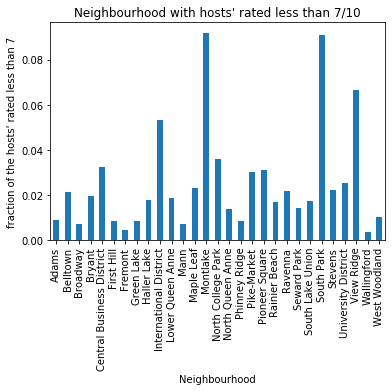

In [33]:
seattle_host_loc70 = seattle_below_70.neighbourhood_cleansed.value_counts()
(seattle_host_loc70/seattle_host_loc).dropna().plot(kind="bar");
plt.ylabel('fraction of the hosts\' rated less than 7')
plt.xlabel('Neighbourhood')
plt.title("Neighbourhood with hosts' rated less than 7/10");

Property_type vs Price


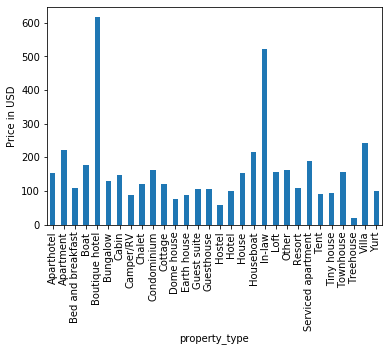

In [35]:
(seattle_listing.groupby(["property_type"]).price.mean()).dropna().plot(kind='bar');
plt.ylabel('Price in USD');

From the graph above we see that **Camper/RV, Dome house, Hostel, and Treehouse** are among the cheaper options to stay in Seattle (Costs less than $100). 